In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()


,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [2]:
df.describe()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
count,2790.00000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000
mean,1395.50000,21.737849,59.001434,2.642991,69.804409,67.404839,24.998925,98.973118
std,805.54795,5.062546,20.307390,1.360220,43.587310,43.097899,22.810558,54.924574
min,1.00000,9.900000,15.000000,1.000000,4.150000,4.150000,0.850000,0.000000
25%,698.25000,18.100000,42.000000,1.694444,41.475000,39.750000,9.275000,61.000000
50%,1395.50000,22.000000,57.000000,2.305556,62.550000,60.450000,20.350000,84.000000
75%,2092.75000,26.100000,77.000000,3.305556,87.650000,83.950000,34.050000,134.000000
max,2790.00000,33.400000,100.000000,9.000000,258.850000,256.050000,160.550000,383.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                       
---  ------            --------------  -----                       
 0   id                2790 non-null   int64                       
 1   city              2790 non-null   object                      
 2   timestamp         2790 non-null   datetime64[ns, Asia/Kolkata]
 3   temperature       2790 non-null   float64                     
 4   humidity          2790 non-null   float64                     
 5   wind_speed        2790 non-null   float64                     
 6   pm10              2790 non-null   float64                     
 7   pm2_5             2790 non-null   float64                     
 8   nitrogen_dioxide  2790 non-null   float64                     
 9   ozone             2790 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(7), int64(1), object(1)
memo

In [4]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [5]:
numeric_cols = ["temperature","humidity","wind_speed","pm10","pm2_5","nitrogen_dioxide","ozone"]

df[numeric_cols] = df.groupby("city")[numeric_cols].transform(
    lambda x: x.interpolate(method="linear", limit_direction="both")
)

In [6]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [7]:
df.nunique()

id                  2790
city                  15
timestamp           2790
temperature          217
humidity              74
wind_speed            77
pm10                 837
pm2_5                833
nitrogen_dioxide     648
ozone                269
dtype: int64

In [8]:
df_min_pm10 = pd.read_sql("""
SELECT city , MIN(pm10) AS min_pm10
FROM weather_data
GROUP BY city
ORDER BY min_pm10
LIMIT 5
""", engine)


In [9]:
df_max_pm10 = pd.read_sql("""
SELECT city , Max(pm10) AS max_pm10
FROM weather_data
GROUP BY city
ORDER BY max_pm10 DESC
LIMIT 5
""", engine)

In [10]:
df_max_pm2_5 = pd.read_sql("""
SELECT city , MAX(pm2_5) AS max_pm2_5
FROM weather_data
GROUP BY city
ORDER BY max_pm2_5 DESC
LIMIT 5
""", engine)


In [11]:
df_min_pm2_5 = pd.read_sql("""
SELECT city , MIN(pm2_5) AS min_pm2_5
FROM weather_data
GROUP BY city
ORDER BY min_pm2_5
LIMIT 5
""", engine)


In [12]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
id,1.000000,0.075991,0.243760,-0.140797,0.172350,0.179270,0.081326,-0.040869
temperature,0.075991,1.000000,-0.409326,0.432945,-0.211036,-0.212179,-0.329768,0.322512
humidity,0.243760,-0.409326,1.000000,0.092607,0.082729,0.082182,0.183393,-0.270893
wind_speed,-0.140797,0.432945,0.092607,1.000000,-0.400188,-0.405966,-0.332550,0.065719
pm10,0.172350,-0.211036,0.082729,-0.400188,1.000000,0.999082,0.715248,-0.193465
pm2_5,0.179270,-0.212179,0.082182,-0.405966,0.999082,1.000000,0.729813,-0.201614
nitrogen_dioxide,0.081326,-0.329768,0.183393,-0.332550,0.715248,0.729813,1.000000,-0.439277
ozone,-0.040869,0.322512,-0.270893,0.065719,-0.193465,-0.201614,-0.439277,1.000000


# "Correlation between different variables"

In [14]:
df_city = df[df['city'] == 'Dehradun']


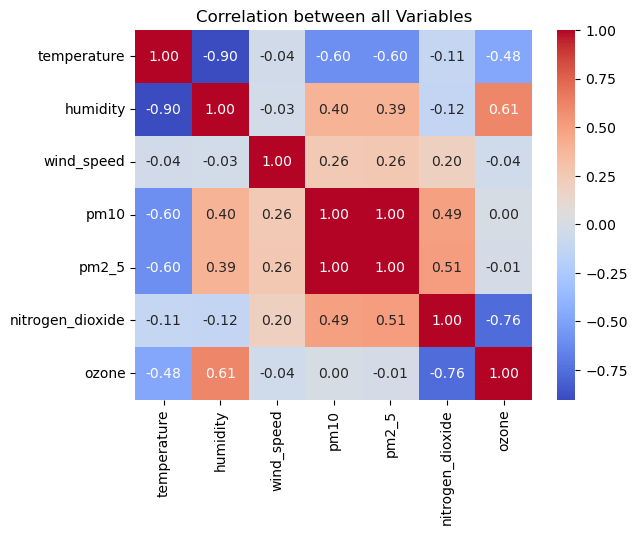

In [15]:
num_columns = ['temperature','humidity','wind_speed','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.heatmap(df_city[num_columns].corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation between all Variables')
plt.show()


# "Boxplot of all Numeric Columns"

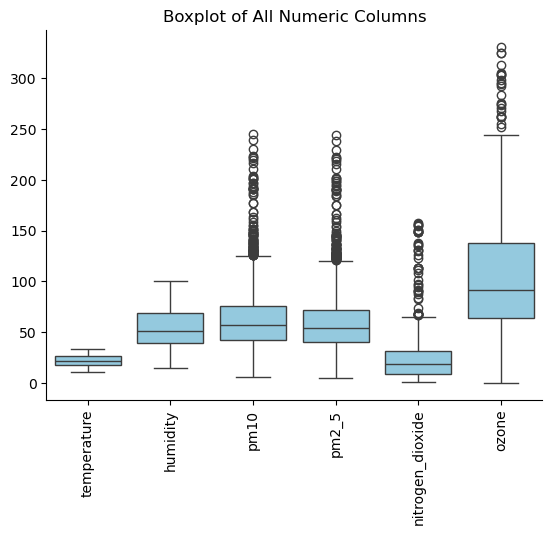

In [15]:
num_columns = ['temperature','humidity','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.boxplot(data=df[num_columns],color='skyblue')
plt.xticks(rotation=90)
plt.title('Boxplot of All Numeric Columns')
sns.despine()
plt.show()

# "MIN & MAX PM10 AND PM2.5"

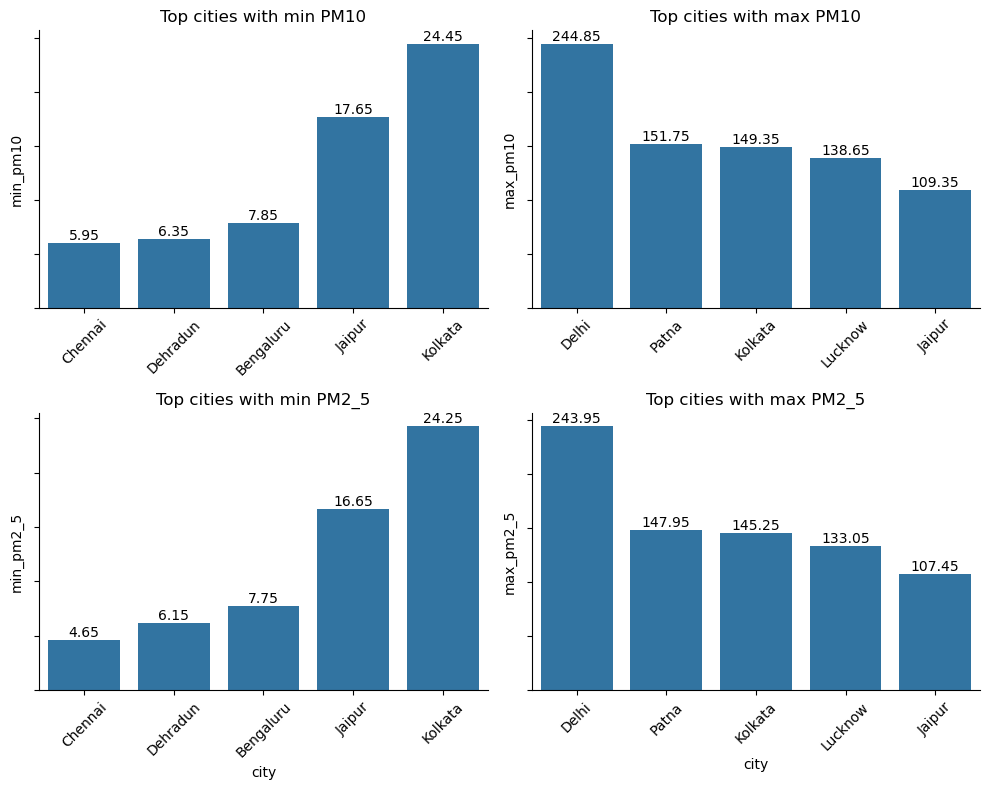

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(data=df_min_pm10, x='city',y='min_pm10', ax=axes[0,0])
axes[0,0].set_title("Top cities with min PM10")
axes[0,0].bar_label(axes[0,0].containers[0])

sns.barplot(data=df_max_pm10, x='city',y='max_pm10', ax=axes[0,1])
axes[0,1].set_title("Top cities with max PM10")
axes[0,1].bar_label(axes[0,1].containers[0])

sns.barplot(data=df_min_pm2_5, x='city',y='min_pm2_5', ax=axes[1,0])
axes[1,0].set_title("Top cities with min PM2_5")
axes[1,0].bar_label(axes[1,0].containers[0])

sns.barplot(data=df_max_pm2_5, x='city',y='max_pm2_5', ax=axes[1,1])
axes[1,1].set_title("Top cities with max PM2_5")
axes[1,1].bar_label(axes[1,1].containers[0])

for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

for ax in axes.flat:
    ax.set_yticklabels([])   # removes numbers

for ax in axes[0]:
    ax.set_xlabel('')

sns.despine()
plt.tight_layout()
plt.show()

In [17]:
df_avg_temp = pd.read_sql("""
SELECT
    city,
    ROUND(AVG(temperature)::numeric) AS avg_temp
FROM weather_data
GROUP BY city
ORDER BY avg_temp DESC
LIMIT 10""", engine)


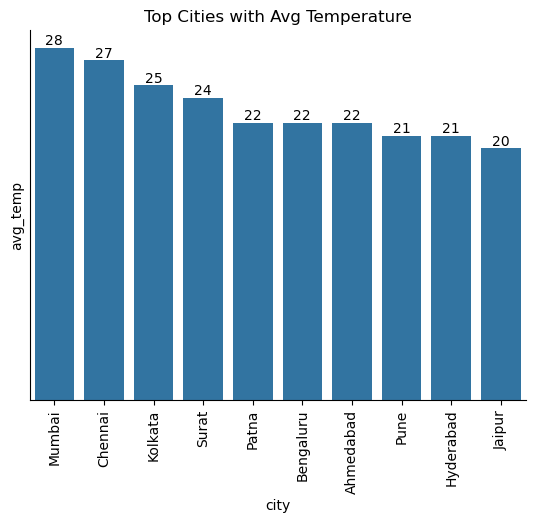

In [18]:
ax = sns.barplot(df_avg_temp, x='city', y='avg_temp')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
ax.set_yticks([])
plt.title("Top Cities with Avg Temperature")
sns.despine()
plt.show()